In [27]:
import numpy as np
import scipy.linalg as eig
import matplotlib.pyplot as plt

# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Dana Romero Bustos
*Métodos computacionales 2025-I*

---

# 1.

<center>

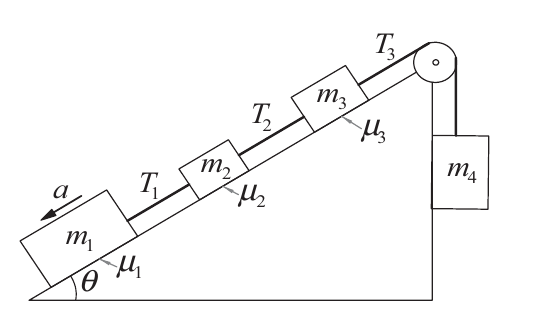

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [ ]:
# Datos
theta = np.radians(45)
g = 9.81  # m/s^2

m = np.array([10.0, 4.0, 5.0, 6.0])   # m1, m2, m3, m4
mu = np.array([0.25, 0.3, 0.2])       # mu1, mu2, mu3

# Matriz A (4x4)
A = np.array([
    [ 1,  0,  0,  m[0]],
    [-1,  1,  0,  m[1]],
    [ 0, -1,  1,  m[2]],
    [ 0,  0, -1,  m[3]]
], dtype=float)

# Vector b (lado derecho)
b = np.array([
    m[0] * g * (np.sin(theta) - mu[0] * np.cos(theta)),
    m[1] * g * (np.sin(theta) - mu[1] * np.cos(theta)),
    m[2] * g * (np.sin(theta) - mu[2] * np.cos(theta)),
    - m[3] * g
], dtype=float)

# Resolver el sistema Ax = b
x = np.linalg.solve(A, b)

T1, T2, T3, a = x

# Mostrar resultados
print(f"T1 = {T1:.6f} N")
print(f"T2 = {T2:.6f} N")
print(f"T3 = {T3:.6f} N")
print(f"a  = {a:.6f} m/s^2")

T1 = 35.891357 N
T2 = 48.860557 N
T3 = 68.540415 N
a  = 1.613402 m/s^2


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

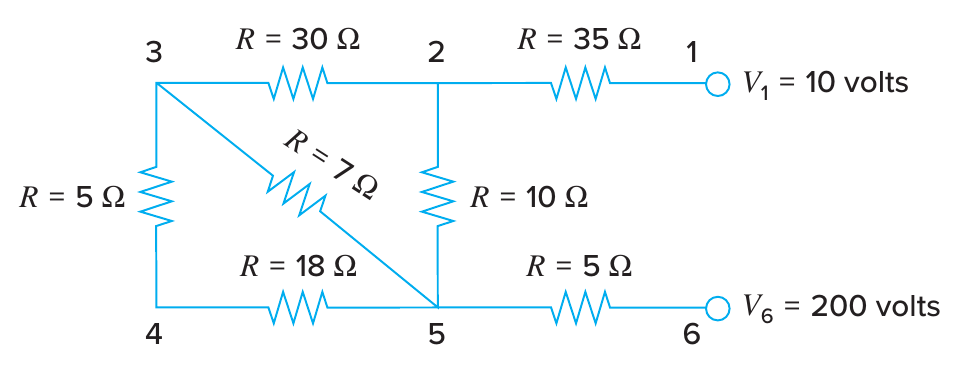


In [ ]:
# Resistencias
R = np.array([35, 30, 5, 18, 5, 10, 7], dtype=float)

A = np.array([
    [ 1, -1,  0,  0,  0,  0, -1],
    [ 0,  1, -1,  0,  0, -1,  0],
    [ 0,  0,  1, -1,  0,  0,  0],
    [ 0,  0,  0,  1, -1, -1, -1],
    [-R[0], 0, 0, 0, -R[4], 0, -R[5]],
    [ 0, 0, R[2], R[3], 0, -R[6], 0],
    [ 0, R[1], 0, 0, 0, R[6], -R[5]]
], dtype=float)

b = np.array([0, 0, 0, 0, 210, 0, 0], dtype=float)

# Resolver el sistema Ax = b
x = np.linalg.solve(A, b)

i1 , i2 , i3 , i4 , i5 , i6 , i7 = x

# Mostrar resultados
print(f"i1 = {i1:.6f}")
print(f"i2 = {i2:.6f}")
print(f"i3 = {i3:.6f}")
print(f"i4  = {i4:.6f}")
print(f"i5 = {i5:.6f}")
print(f"i6 = {i6:.6f}")
print(f"i7 = {i7:.6f}")

i1 = -5.481588
i2 = -1.208285
i3 = -0.281933
i4  = -0.281933
i5 = 4.917722
i6 = -0.926352
i7 = -4.273303


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

In [30]:
A = np.array([[2, -1, 1],
              [0,  3, -1],
              [2,  1,  3]], dtype=float)

# Calcular los valores propios y vectores propios
valores, vectores = np.linalg.eig(A)

# Matriz diagonal D
D = np.diag(valores)

print("\nMatriz diagonal D:")
print(D)

U = vectores
U_inv = np.linalg.inv(U)

# A = U D U_inv
A_diago = U @ D @ U_inv
print("Matriz A = U D U_inv:")
print(A_diago)


Matriz diagonal D:
[[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]]
Matriz A = U D U_inv:
[[ 2.00000000e+00+4.22907063e-10j -1.00000000e+00+4.22907063e-10j
   1.00000000e+00-2.16182500e-24j]
 [ 1.88737914e-15-4.45946263e-10j  3.00000000e+00-4.45946263e-10j
  -1.00000000e+00-1.79300708e-24j]
 [ 2.00000000e+00+2.91325159e-11j  1.00000000e+00+2.91325159e-11j
   3.00000000e+00+1.30125162e-24j]]


Text(0.5, 1.0, 'analitico')

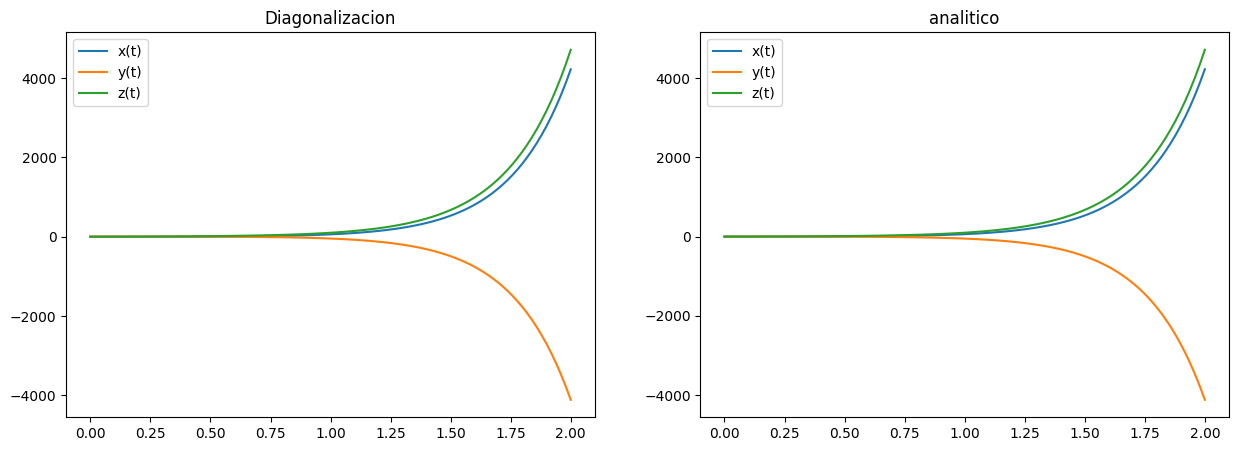

In [31]:
r0 = np.array([1, 1, 2], dtype= float)

# e^(At) = U e^(At) U_inv
rt = lambda t: (U @ np.exp(D * t) @ np.linalg.inv(U)) @ r0

# Solución Analitica
def analitica(t):

  xt = (r0[0]*(np.exp(2*t)*(1+np.exp(2*t)-2*t)) + r0[1]*(-2*t*np.exp(2*t)) + r0[2]*(np.exp(2*t)*(-1 + np.exp(2*t))))/2
  yt = (r0[0]*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t)) + r0[1]*(2*(t+1)*np.exp(2*t)) + r0[2]*(-np.exp(2*t)*(-1 + np.exp(2*t))))/2
  zt = (r0[0]*(np.exp(2*t)*(-1+np.exp(2*t)+2*t)) + r0[1]*(2*t*np.exp(2*t)) + r0[2]*(np.exp(2*t)*(1 + np.exp(2*t))))/2

  return xt, yt, zt

t = np.linspace(0, 2, 100)
x, y, z = np.array([np.real(rt(x)) for x in t]).T
x_analitica, y_analitica, z_analitica = analitica(t)

fig, ax = plt.subplots(1, 2, figsize= (15, 5))

ax[0].plot(t, x, label= 'x(t)')
ax[0].plot(t, y, label= 'y(t)')
ax[0].plot(t, z, label= 'z(t)')

ax[0].legend()
ax[0].set_title('Diagonalizacion')

ax[1].plot(t, x_analitica, label= 'x(t)')
ax[1].plot(t, y_analitica, label= 'y(t)')
ax[1].plot(t, z_analitica, label= 'z(t)')

ax[1].legend()
ax[1].set_title('analitico')


# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [25]:
# Constantes
h_barra = 1.054571817e-34
gamma = 2.0

B_vec = np.array([0.0, 0.0, 1.0e-4])

# H
Bx, By, Bz = B_vec
C = - (gamma * h_barra) / 2.0
H = C * np.array([[Bz, Bx - 1j*By],
                     [Bx + 1j*By, -Bz]], dtype=complex)

# Hermiticidad
H_t = H.conjugate().T

print("H =\n", H)
print("\nH† =\n", H_t)
print("\n¿Es hermitiana?:", np.allclose(H, H_t))

# Autovalores y autovectores
eigvals, eigvecs = np.linalg.eigh(H)
print("\nAutovalores (E):\n", eigvals)
print("\nAutovectores (columnas):\n", eigvecs)

# Normalización y verificación
for i in range(2):
    v = eigvecs[:, i]
    print(f"\nNorm(v_{i}) = {np.vdot(v,v):.16f} (debe ser 1)")
    # comprobar H v = E v
    lhs = H @ v
    rhs = eigvals[i] * v
    print(f"Residuo ||H v - E v|| = {np.linalg.norm(lhs-rhs):.3e}")

# Separación de niveles y conversión a eV
deltaE = eigvals[1] - eigvals[0]
eV = 1.602176634e-19
print(f"\nDelta E = {deltaE:.3e} J = {deltaE/eV:.3e} eV")

H =
 [[-1.05457182e-38+0.j -0.00000000e+00+0.j]
 [-0.00000000e+00+0.j  1.05457182e-38-0.j]]

H† =
 [[-1.05457182e-38-0.j -0.00000000e+00-0.j]
 [-0.00000000e+00-0.j  1.05457182e-38+0.j]]

¿Es hermitiana?: True

Autovalores (E):
 [-1.05457182e-38  1.05457182e-38]

Autovectores (columnas):
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Norm(v_0) = 1.0000000000000000+0.0000000000000000j (debe ser 1)
Residuo ||H v - E v|| = 0.000e+00

Norm(v_1) = 1.0000000000000000+0.0000000000000000j (debe ser 1)
Residuo ||H v - E v|| = 0.000e+00

Delta E = 2.109e-38 J = 1.316e-19 eV


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

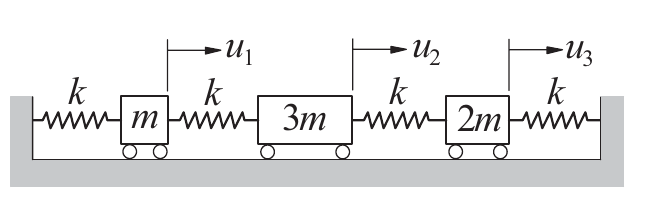
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [34]:
k = 1
m = 1

A = np.array([
    [-2, 1, 0],
    [1, -2, 1],
    [0, 1, -2]])

M = - np.diag([1, 3, 2])

# Au = Mü => Av = w^2 Mv = > k/m M^-1 Av = w^2 v, λ autovalores de M^-1*A, k/m λ = w^2

S = np.linalg.inv(M) @ A

lambda2, formas_modales = np.linalg.eig(S)

w = np.sqrt(k/m * lambda2)

print(f'Para k= {k} y m= {m}:\n',
      f'Las frecuencias de vibracion son: {w}\n',
      f'Formas modales: {formas_modales}')

Para k= 1 y m= 1:
 Las frecuencias de vibracion son: [1.49429737 0.50281358 1.08670167]
 Formas modales: [[-0.96983375 -0.42955167 -0.38362421]
 [ 0.22589817 -0.75050344 -0.31421871]
 [-0.0916107  -0.502225    0.86838877]]
